<a href="https://colab.research.google.com/github/Vedansh553/Flight-Delay-prediction-/blob/main/Flight_Delay_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
. pip install imblearn

In [ ]:
 #Importing Libs
import os
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
from collections import Counter # Data Manipulation
import seaborn as sns # Data Viz
import matplotlib.pyplot as plt # Data Viz
from sklearn import tree # Modelling a tree
from sklearn.impute import SimpleImputer # Perform Imputation
from imblearn.over_sampling import SMOTE # Perform oversampling
from sklearn.preprocessing import OneHotEncoder # Perform OneHotEnconding
from sklearn.model_selection import StratifiedKFold, cross_val_score,cross_val_predict # Cross Validation
from sklearn.linear_model import LogisticRegression # Modelling
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score # Evaluating the Model


#warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
 # Collecting data
df_2019 = pd.read_csv('Jan_2019_ontime.csv')
df_2020 = pd.read_csv('Jan_2020_ontime.csv')
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [ ]:
""" 'DAY_OF_MONTH': Day of the month.
'DAY_OF_WEEK': Day of the week.
'OP_UNIQUE_CARRIER': Unique transport code.
'OP_CARRIER_AIRLINE_ID': Unique aviation operator code.
'OP_CARRIER': IATA code of the operator.
'TAIL_NUM': Tail number.
'OP_CARRIER_FL_NUM': Flight number.
'ORIGIN_AIRPORT_ID': Origin airport ID.
'ORIGIN_AIRPORT_SEQ_ID': Origin airport ID - SEQ.
'ORIGIN': Airport of Origin.
'DEST_AIRPORT_ID': ID of the destination airport.
'DEST_AIRPORT_SEQ_ID': Destination airport ID - SEQ.
'DEST': Destination airport.
'DEP_TIME': Flight departure time.
'DEP_DEL15': Departure delay indicator
'DEP_TIME_BLK': block of time (hour) where the match has been postponed.
'ARR_TIME': Flight arrival time.
'ARR_DEL15': Arrival delay indicator.
'CANCELLED': Flight cancellation indicator.
'DIVERTED': Indicator if the flight has been diverted.
'DISTANCE': Distance between airports."""

" 'DAY_OF_MONTH': Day of the month.\n'DAY_OF_WEEK': Day of the week.\n'OP_UNIQUE_CARRIER': Unique transport code.\n'OP_CARRIER_AIRLINE_ID': Unique aviation operator code.\n'OP_CARRIER': IATA code of the operator.\n'TAIL_NUM': Tail number.\n'OP_CARRIER_FL_NUM': Flight number.\n'ORIGIN_AIRPORT_ID': Origin airport ID.\n'ORIGIN_AIRPORT_SEQ_ID': Origin airport ID - SEQ.\n'ORIGIN': Airport of Origin.\n'DEST_AIRPORT_ID': ID of the destination airport.\n'DEST_AIRPORT_SEQ_ID': Destination airport ID - SEQ.\n'DEST': Destination airport.\n'DEP_TIME': Flight departure time.\n'DEP_DEL15': Departure delay indicator\n'DEP_TIME_BLK': block of time (hour) where the match has been postponed.\n'ARR_TIME': Flight arrival time.\n'ARR_DEL15': Arrival delay indicator.\n'CANCELLED': Flight cancellation indicator.\n'DIVERTED': Indicator if the flight has been diverted.\n'DISTANCE': Distance between airports."

In [ ]:
#Creating year indicator.
df_2019['year'] = 2019
df_2020['year'] = 2020

#Checking if the bases have the same columns
print(set(df_2020.columns) == set(df_2019.columns))

#Generating the unique base
dataset = pd.concat([df_2019,df_2020])
print(dataset.shape)
print('\n')
dataset.head()

True
(1191331, 23)




,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,year
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN,2019
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN,2019
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN,2019
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN,2019
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN,2019


In [ ]:
data = dataset.drop(['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21'], axis=1)
data = data.set_index('OP_CARRIER_FL_NUM')
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
OP_CARRIER_FL_NUM,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019


In [ ]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year
OP_CARRIER_FL_NUM,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019


In [ ]:
#Dataframe summary
pd.DataFrame({'unicos':data.nunique(),
              'missing': data.isna().sum()/data.count(),
              'tipo':data.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.000000,int64
DAY_OF_WEEK,7,0.000000,int64
ORIGIN,353,0.000000,object
DEST,353,0.000000,object
DEP_TIME,1440,0.019700,float64
DEP_DEL15,2,0.019733,float64
DEP_TIME_BLK,19,0.000000,object
ARR_TIME,1440,0.020679,float64
ARR_DEL15,2,0.022399,float64
CANCELLED,2,0.000000,float64


In [ ]:
#Missing values
data.dropna(inplace=True)

#Transformation of data types
colunas = ['DAY_OF_WEEK','DAY_OF_MONTH','DEP_DEL15','ARR_DEL15','CANCELLED','DIVERTED']
for col in colunas:
  data[col] = data[col].astype('category')

#Discretization
data['DISTANCE_cat'] = pd.qcut(data['DISTANCE'], q=4)

In [ ]:
#Dataframe summary after pre-processing
pd.DataFrame({'unicos':data.nunique(),
              'missing': data.isna().mean()*100,
              'tipo':data.dtypes})

,unicos,missing,tipo
DAY_OF_MONTH,31,0.0,category
DAY_OF_WEEK,7,0.0,category
ORIGIN,353,0.0,object
DEST,353,0.0,object
DEP_TIME,1440,0.0,float64
DEP_DEL15,2,0.0,category
DEP_TIME_BLK,19,0.0,object
ARR_TIME,1440,0.0,float64
ARR_DEL15,2,0.0,category
CANCELLED,1,0.0,category


In [ ]:
#check data
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat
OP_CARRIER_FL_NUM,,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]"
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]"
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]"
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]"
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]"


Text(0, 0.5, 'Freq')

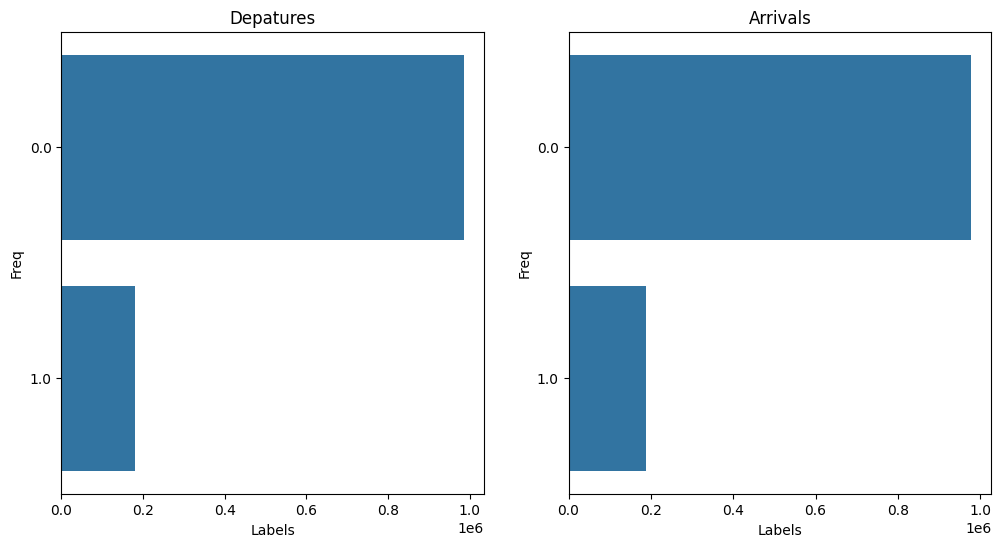

In [ ]:
#The concentration of delay and timely arrivals both on departure and on arrival?
f, (ax,ax1) = plt.subplots(1,2, figsize=(12,6))
dep = sns.countplot(data['DEP_DEL15'], ax=ax)
dep.set_title('Depatures')
dep.set_xlabel('Labels')
dep.set_ylabel('Freq')

arr = sns.countplot(data['ARR_DEL15'], ax=ax1)
arr.set_title('Arrivals')
arr.set_xlabel('Labels')
arr.set_ylabel('Freq')

Text(0, 0.5, 'Freq')

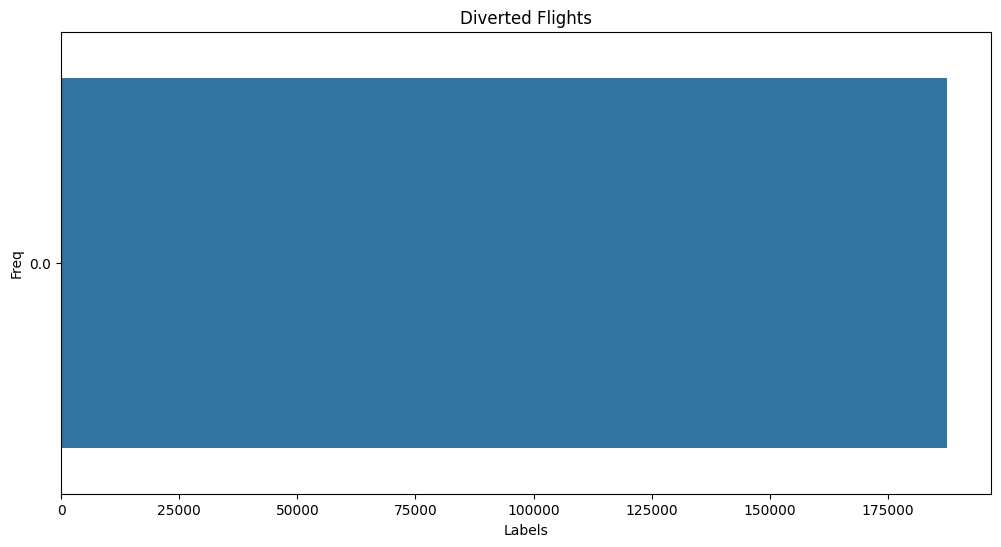

In [ ]:
# Percentage of delayed flights that are canceled or diverted?
voos_atrasados = data.loc[data['ARR_DEL15'] == 1,['DIVERTED']]


f, ax= plt.subplots(figsize=(12,6))

#Desvios
desv = sns.countplot(voos_atrasados['DIVERTED'], ax=ax)
desv.set_title('Diverted Flights')
desv.set_xlabel('Labels')
desv.set_ylabel('Freq')

In [ ]:
# Convert ARR_DEL15 to numeric if needed
data['ARR_DEL15'] = pd.to_numeric(data['ARR_DEL15'], errors='coerce')  # or data['ARR_DEL15'].astype(int) if sure

# Group by day of week
week = data[['DAY_OF_WEEK', 'ARR_DEL15']].groupby('DAY_OF_WEEK', observed=True).sum().sort_values(by='ARR_DEL15', ascending=False)
week['PERCENTUAL'] = week['ARR_DEL15'] / week['ARR_DEL15'].sum() * 100

# Group by day of month
month = data[['DAY_OF_MONTH', 'ARR_DEL15']].groupby('DAY_OF_MONTH', observed=True).sum().sort_values(by='ARR_DEL15', ascending=False)
month['PERCENTUAL'] = month['ARR_DEL15'] / month['ARR_DEL15'].sum() * 100

print('> Delayed flights by weekday<')
print(week)
print('\n')
print('> Delayed flights by monthday <')
print(month)

> Delayed flights by weekday<
             ARR_DEL15  PERCENTUAL
DAY_OF_WEEK                       
4              34414.0   18.353448
5              30724.0   16.385522
3              27485.0   14.658119
1              25291.0   13.488030
7              23988.0   12.793122
6              23084.0   12.311007
2              22521.0   12.010752


> Delayed flights by monthday <
              ARR_DEL15  PERCENTUAL
DAY_OF_MONTH                       
24               8594.0    4.583296
2                8009.0    4.271307
23               7810.0    4.165178
18               7717.0    4.115580
3                7523.0    4.012117
17               7518.0    4.009450
16               7252.0    3.867589
11               6959.0    3.711328
4                6942.0    3.702262
21               6877.0    3.667596
31               6820.0    3.637198
6                6418.0    3.422806
13               6299.0    3.359341
25               6254.0    3.335342
1                6094.0    3.250012
10       

In [ ]:
# Concentration of delays due to 'DEP_TIME_BLK'?
time_blk = data[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
time_blk['PERCENTUAL'] = time_blk['ARR_DEL15']/(time_blk['ARR_DEL15'].sum())*100
time_blk

,ARR_DEL15,PERCENTUAL
DEP_TIME_BLK,,
1700-1759,14875.0,7.933037
1800-1859,14020.0,7.477054
1600-1659,13292.0,7.088802
1500-1559,12760.0,6.805079
1900-1959,12640.0,6.741082
1400-1459,12618.0,6.729349
1200-1259,11761.0,6.272299
1100-1159,11181.0,5.962977
1300-1359,11101.0,5.920312


In [ ]:
# Which 'Origin' airport stands out in delay?

# Convert ARR_DEL15 to numeric if needed
data['DEP_DEL15'] = pd.to_numeric(data['DEP_DEL15'], errors='coerce')  # or data['ARR_DEL15'].astype(int) if sure

#
origin_later = data[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)
origin_later['PERCENTUAL'] = origin_later['DEP_DEL15']/(origin_later['DEP_DEL15'].sum())*100
origin_later.head()

,DEP_DEL15,PERCENTUAL
ORIGIN,,
ORD,10639.0,5.918710
DFW,8559.0,4.761560
ATL,7737.0,4.304264
DEN,6154.0,3.423606
CLT,5717.0,3.180493


In [ ]:
# Which airport of Destination stands out in delays?
dest_later = data[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
dest_later['PERCENTUAL'] = dest_later['ARR_DEL15']/(dest_later['ARR_DEL15'].sum())*100
dest_later.head()

,ARR_DEL15,PERCENTUAL
DEST,,
ORD,10170.0,5.423798
DFW,8667.0,4.622227
ATL,7263.0,3.873455
LGA,7077.0,3.774259
SFO,6114.0,3.260678


In [ ]:
# Helper function to create ARR_TIME_BLOCK
def arr_time(x):

  if x >= 600 and x <= 659:
    return '0600-0659'
  elif x>=1400 and x<=1459:
    return '1400-1459'
  elif x>=1200 and x<=1259:
    return '1200-1259'
  elif x>=1500 and x<=1559:
    return '1500-1559'
  elif x>=1900 and x<=1959:
    return '1900-1959'
  elif x>=900 and x<=959:
    return '0900-0959'
  elif x>=1000 and x<=1059:
    return  '1000-1059'
  elif x>=2000 and x<=2059:
    return '2000-2059'
  elif x>=1300 and x<=1359:
    return '1300-1359'
  elif x>=1100 and x<=1159:
    return '1100-1159'
  elif x>=800 and x<=859:
    return '0800-0859'
  elif x>=2200 and x<=2259:
    return '2200-2259'
  elif x>=1600 and x<=1659:
    return '1600-1659'
  elif x>=1700 and x<=1759:
    return '1700-1759'
  elif x>=2100 and x<=2159:
    return '2100-2159'
  elif x>=700 and x<=759:
    return '0700-0759'
  elif x>=1800 and x<=1859:
    return '1800-1859'
  elif x>=1 and x<=559:
    return '0001-0559'
  elif x>=2300 and x<=2400:
    return '2300-2400'

In [ ]:
# We can create ARR_TIME_BLOCK.
data['ARR_TIME'] = data['ARR_TIME'].astype('int')
data['ARR_TIME_BLOCK'] = data['ARR_TIME'].apply(lambda x :arr_time(x))
data.reset_index(inplace=True)
data.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759
1,3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]",1600-1659
2,3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]",1300-1359
3,3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]",1600-1659
4,3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]",1900-1959


In [ ]:
# Amount of delays within a DEP_TIME_BLK.
count_time_blk = data[['DEP_TIME_BLK','ARR_DEL15']].groupby('DEP_TIME_BLK').sum().sort_values(by='ARR_DEL15',ascending=False)
count_time_blk.reset_index(inplace=True)
count_time_blk.head()
data1 = data.merge(count_time_blk, left_on='DEP_TIME_BLK', right_on='DEP_TIME_BLK')
data1.rename({'ARR_DEL15_y':'quant_dep_time_blk','ARR_DEL15_x':'ARR_DEL15' }, inplace=True, axis=1)
data1.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0
1,3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]",1600-1659,12618.0
2,3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]",1300-1359,11761.0
3,3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]",1600-1659,12760.0
4,3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]",1900-1959,12640.0


In [ ]:
# Number of delays DEP_DEL15 per ORIGIN.
count_later_origin = data[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum().sort_values(by='DEP_DEL15',ascending=False)
count_later_origin.reset_index(inplace=True)
count_later_origin.head()
data2 = data1.merge(count_later_origin, left_on='ORIGIN', right_on='ORIGIN')
data2.rename({'DEP_DEL15_y':'count_later_origin','DEP_DEL15_x':'DEP_DEL15' }, inplace=True, axis=1)
data2.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk,count_later_origin
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0
1,3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]",1600-1659,12618.0,3431.0
2,3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]",1300-1359,11761.0,3717.0
3,3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]",1600-1659,12760.0,143.0
4,3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]",1900-1959,12640.0,7737.0


In [ ]:
# Number of delays ARR_DEL15 per DEST.
count_later_dest = data[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
count_later_dest.reset_index(inplace=True)
count_later_dest.head()
data3 = data2.merge(count_later_dest, left_on='DEST', right_on='DEST')
data3.rename({'ARR_DEL15_y':'count_later_dest','ARR_DEL15_x':'ARR_DEL15' },inplace=True, axis=1)
data3.head()

,OP_CARRIER_FL_NUM,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,year,DISTANCE_cat,ARR_TIME_BLOCK,quant_dep_time_blk,count_later_origin,count_later_dest
0,3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722,0.0,0.0,0.0,300.0,2019,"(30.999, 368.0]",0700-0759,8334.0,114.0,7263.0
1,3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633,0.0,0.0,0.0,596.0,2019,"(368.0, 641.0]",1600-1659,12618.0,3431.0,1231.0
2,3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329,0.0,0.0,0.0,229.0,2019,"(30.999, 368.0]",1300-1359,11761.0,3717.0,1231.0
3,3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625,0.0,0.0,0.0,223.0,2019,"(30.999, 368.0]",1600-1659,12760.0,143.0,7263.0
4,3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940,0.0,0.0,0.0,579.0,2019,"(368.0, 641.0]",1900-1959,12640.0,7737.0,48.0


In [ ]:
#Data Preparation
base_final = data3.copy()
base_final.drop(['DEP_TIME','ARR_TIME','OP_CARRIER_FL_NUM'], inplace=True, axis=1)
base_final.set_index('year',inplace=True)

In [ ]:
# Define categorical columns
cat_columns = ['DAY_OF_MONTH', 'DAY_OF_WEEK','DEP_DEL15','DEP_TIME_BLK','CANCELLED',
               'DIVERTED','DISTANCE_cat','ARR_TIME_BLOCK']

# Optional: cast non-object columns to category if needed
for col in cat_columns:
    if col in base_final.columns:
        base_final[col] = base_final[col].astype('category')

# Select categorical variables
cat_vars_final = base_final[cat_columns]

# One Hot Encode
enc = OneHotEncoder().fit(cat_vars_final)

cat_vars_ohe_final = enc.transform(cat_vars_final).toarray()
cat_vars_ohe_final = pd.DataFrame(cat_vars_ohe_final, index=cat_vars_final.index,
                                  columns=enc.get_feature_names_out(cat_columns))


In [ ]:
#Logisitc Regression Model

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Example DataFrame (replace with your actual data)
df_final = pd.DataFrame({
    'year': [2019]*5 + [2020]*5,
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
})

# Set year as index (because your original code filters by index == 2019 or 2020)
df_final.set_index("year", inplace=True)

# Split into features and target
target_final = df_final["target"]
cat_vars_ohe_final = df_final.drop(columns=["target"])

# Now you can safely split
target_2019_final = target_final[target_final.index == 2019]
target_2020_final = target_final[target_final.index == 2020]

cat_vars_ohe_2019_final = cat_vars_ohe_final[cat_vars_ohe_final.index == 2019]
cat_vars_ohe_2020_final = cat_vars_ohe_final[cat_vars_ohe_final.index == 2020]

# Instantiate and train model
lr_model_final = LogisticRegression()
lr_model_final.fit(cat_vars_ohe_2019_final, target_2019_final)

# Predict and evaluate (optional)
pred_2020 = lr_model_final.predict(cat_vars_ohe_2020_final)

In [ ]:
# Which airport of Destination stands out in delays?
dest_later = data[['DEST','ARR_DEL15']].groupby('DEST').sum().sort_values(by='ARR_DEL15',ascending=False)
dest_later['PERCENTUAL'] = dest_later['ARR_DEL15']/(dest_later['ARR_DEL15'].sum())*100
dest_later.head()

,ARR_DEL15,PERCENTUAL
DEST,,
ORD,10170.0,5.423798
DFW,8667.0,4.622227
ATL,7263.0,3.873455
LGA,7077.0,3.774259
SFO,6114.0,3.260678


In [ ]:
#Test Data

# Predict
pred = lr_model_final.predict(cat_vars_ohe_2020_final)
pred_prob = lr_model_final.predict_proba(cat_vars_ohe_2020_final)

# print classification report
print("Relatório de Classificação:\n",
       classification_report(target_2020_final, pred, digits=4))

# print the area under the curve
print(f'AUC: {roc_auc_score(target_2020_final,pred_prob[:,1])}')

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.4000    1.0000    0.5714         2
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.4000         5
   macro avg     0.2000    0.5000    0.2857         5
weighted avg     0.1600    0.4000    0.2286         5

AUC: 0.5


In [ ]:
pip install yellowbrick

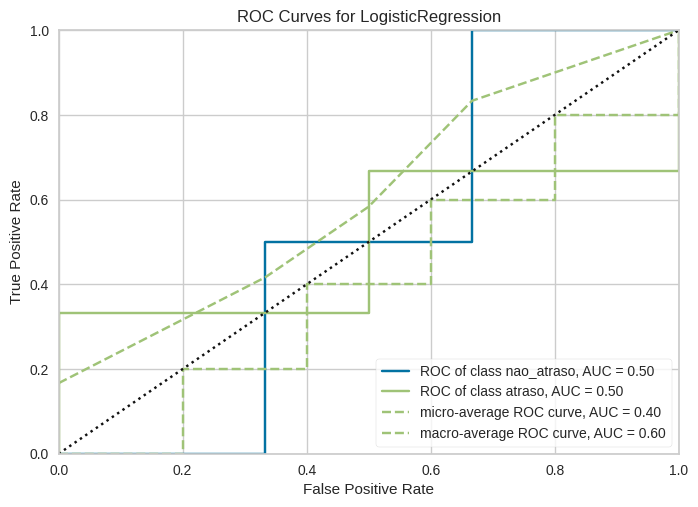

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
#ROC Curve
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(lr_model_final, classes=["nao_atraso", "atraso"])

visualizer.fit(cat_vars_ohe_2019_final, target_2019_final)
visualizer.score(cat_vars_ohe_2020_final, target_2020_final)
visualizer.show()

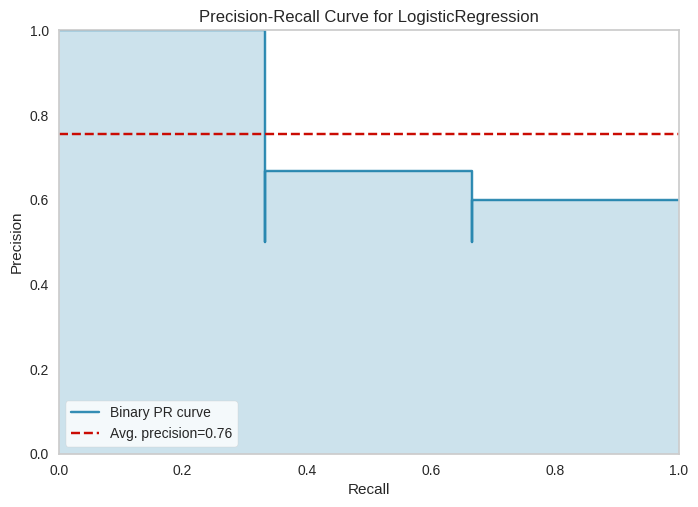

In [ ]:
from yellowbrick.classifier import precision_recall_curve
viz = precision_recall_curve(lr_model_final, cat_vars_ohe_2019_final, target_2019_final, cat_vars_ohe_2020_final, target_2020_final)

In [ ]:
y_scores_final = lr_model_final.decision_function(cat_vars_ohe_2020_final)
y_pred_recall = (y_scores_final > -3)

print(f'New precision: {precision_score(target_2020_final,y_pred_recall)}')
print(f'New recall: {recall_score(target_2020_final,y_pred_recall)}')

New precision: 0.6
New recall: 1.0
